In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf

# Download Price Data

In [39]:
import os

cwd = os.getcwd()
# Check if price data have been saved
price_data = os.path.join(cwd, "price_data")
if not os.path.exists(price_data):
    # Getting the Nasdaq 100 ticker symbols from Wikipedia
    nas_df = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]
    tickers = nas_df.Ticker.to_list()
    # Download the Nasdaq 100 Adjusted Close price data with yfinance
    df = yf.download(tickers, start="2010-01-01")
    # Create price_data directory
    os.makedirs(price_data)
    # Save a copy of the dataframe to price_data directory
    df.to_csv(os.path.join(price_data, "Nasdaq-100.csv"))
else:
    # Load the Nasdaq-100.csv
    df = pd.read_csv(os.path.join(price_data, "Nasdaq-100.csv"), 
                     header=[0,1], index_col=0)
    df.index = pd.to_datetime(df.index)

In [40]:
sdf = df.swaplevel(axis=1)

# Analysis

In [60]:
stat = pd.DataFrame(columns=['o_pct', 'h_pct', 'higher', 'closed', 'lower'])

for tic in sdf.columns.levels[0]:
    data = sdf[tic].loc[:, ['Open', 'High', 'Low', 'Close']].dropna().copy()
    if len(data) < 2500:
        continue
    pct_h = data['High'] / data['Close'].shift()
    pct_c = data['Close'] / data['Close'].shift()
    pct_o = data['Open'] / data['Close'].shift()
    pct_l = data['Low'] / data['Close'].shift()
    mask = pct_o > 1
    stat.loc[tic] = [mask.mean(), 
                     (pct_h > 1).mean(), 
                     pct_h[mask].mean(),
                     pct_c[~mask].mean(), 
                     pct_l[~mask].mean()]

In [61]:
stat['higher'].nlargest(10)

ENPH    1.051411
TSLA    1.033420
AMD     1.031953
FANG    1.031108
MU      1.029111
MELI    1.028230
DXCM    1.026788
NFLX    1.026328
NVDA    1.025141
NXPI    1.025003
Name: higher, dtype: float64

<AxesSubplot: xlabel='Date'>

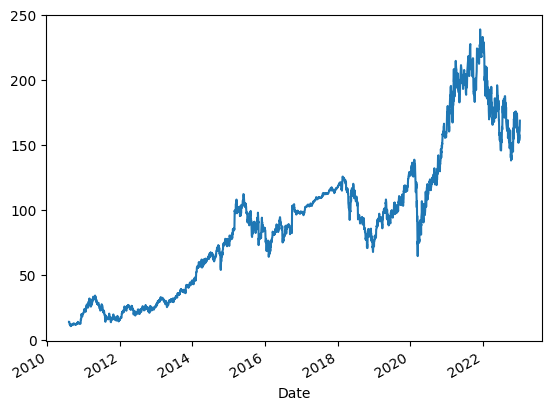

In [63]:
sdf['NXPI']['Close'].plot()